## Put this notebook in the same directory as your config file and the experiment folder!

In [1]:
%env CUDA_VISIBLE_DEVICES=0
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('<path to the repo>/jiant')   # --->  --->  --->  --->  --->  --->  ---> # CHANGE THIS

# what you feed into python ../jiant/main.py, remove quotes('") and split by arg
cl_arguments = [
    '--config_file', 'srl_bayes_layer1.conf', # --->  --->  --->  --->  --->  --->  ---> # CHANGE THIS
    '--overrides', 'exp_name = srl_bayes_layer1, run_name = run1, project_dir = .'       # CHANGE THIS
]

env: CUDA_VISIBLE_DEVICES=0


### setup jiant training env

In [2]:
from jiant.__main__ import *

# this is a copy of jiant/__main__.py : def main
# we can use it to create tasks, trainer, etc etc
cl_args = handle_arguments(cl_arguments)
args = config.params_from_file(cl_args.config_file, cl_args.overrides)
train_type = args.get('train_type', "SamplingMultiTaskTrainer")

if train_type != "SamplingMultiTaskTrainer":
    print("\n\n\n", train_type, "\n\n\n")

# Check for deprecated arg names
check_arg_name(args)
args, seed = initial_setup(args, cl_args)
# Load tasks
log.info("Loading tasks...")
start_time = time.time()
pretrain_tasks, target_tasks, vocab, word_embs = build_tasks(args)
tasks = sorted(set(pretrain_tasks + target_tasks), key=lambda x: x.name)
log.info("\tFinished loading tasks in %.3fs", time.time() - start_time)
log.info("\t Tasks: {}".format([task.name for task in tasks]))

log.info("Building model...")
start_time = time.time()
model = build_model(args, vocab, word_embs, tasks)
log.info("Finished building model in %.3fs", time.time() - start_time)

# Start Tensorboard if requested
if cl_args.tensorboard:
    tb_logdir = os.path.join(args.run_dir, "tensorboard")
    _run_background_tensorboard(tb_logdir, cl_args.tensorboard_port)

check_configurations(args, pretrain_tasks, target_tasks)

03/25 09:52:06 PM: Better speed can be achieved with apex installed from https://www.github.com/nvidia/apex .
03/25 09:52:06 PM: Better speed can be achieved with apex installed from https://www.github.com/nvidia/apex .
03/25 09:52:06 PM: Better speed can be achieved with apex installed from https://www.github.com/nvidia/apex .
03/25 09:52:06 PM: Loading config from srl_bayes_layer1_256_dr0.conf
03/25 09:52:06 PM: Config overrides: exp_name = srl_bayes_layer1_256_dr0, run_name = run1, clf_first_layer_clip_var = 100000, project_dir = .
03/25 09:52:07 PM: Git branch: master
03/25 09:52:07 PM: Git SHA: 292cf0081a0e5d7c4a0b1bcfd299e2a31a8e28c4





 SamplingMultiTaskTrainerBayes 





03/25 09:52:07 PM: Parsed args: 
{
  "allow_missing_task_map": 1,
  "allow_untrained_encoder_parameters": 1,
  "classifier": "bayes_mlp",
  "classifier_dropout": "0.",
  "clf_first_layer_clip_var": 100000,
  "clf_num_hid_layers": 1,
  "data_dir": "/opt/lena-voita/probing/jiant/data",
  "do_target_task_training": 0,
  "edges-srl-ontonotes": {
    "classifier_dropout": 0.0
  },
  "edges-tmpl-bayes": {
    "classifier_dropout": 0.0,
    "classifier_hid_dim": 256,
    "classifier_span_pooling": "attn",
    "max_vals": 250,
    "pair_attn": 0,
    "span_classifier_loss_fn": "softmax",
    "val_interval": 1000
  },
  "elmo_layer_index": 1,
  "exp_dir": "./srl_bayes_layer1_256_dr0/",
  "exp_name": "srl_bayes_layer1_256_dr0",
  "input_module": "elmo",
  "keep_all_checkpoints": 1,
  "local_log_path": "./srl_bayes_layer1_256_dr0/run1/log.log",
  "lr": 0.001,
  "lr_decay_factor": 0.999999,
  "lr_patience": 5,
  "max_seq_len": 512,
  "min_epochs": 500,
  "patience": 100,
  "pretrain_tasks": "edges

03/25 09:55:02 PM:    _text_field_embedder.token_embedder_elmo._elmo._elmo_lstm._token_embedder.char_conv_4.bias
03/25 09:55:02 PM:    _text_field_embedder.token_embedder_elmo._elmo._elmo_lstm._token_embedder.char_conv_4.weight
03/25 09:55:02 PM:    _text_field_embedder.token_embedder_elmo._elmo._elmo_lstm._token_embedder.char_conv_5.bias
03/25 09:55:02 PM:    _text_field_embedder.token_embedder_elmo._elmo._elmo_lstm._token_embedder.char_conv_5.weight
03/25 09:55:02 PM:    _text_field_embedder.token_embedder_elmo._elmo._elmo_lstm._token_embedder.char_conv_6.bias
03/25 09:55:02 PM:    _text_field_embedder.token_embedder_elmo._elmo._elmo_lstm._token_embedder.char_conv_6.weight
03/25 09:55:02 PM:    _text_field_embedder.token_embedder_elmo._elmo.scalar_mix_0.gamma
03/25 09:55:02 PM:    _text_field_embedder.token_embedder_elmo._elmo.scalar_mix_0.scalar_parameters.0
03/25 09:55:02 PM:    _text_field_embedder.token_embedder_elmo._elmo.scalar_mix_0.scalar_parameters.1
03/25 09:55:02 PM:    _t

Constructing BayesMLP
Applying dropout 0.0
Using intermediate size (hidden dim / rank) 256


03/25 09:55:04 PM: Model specification:
03/25 09:55:04 PM: MultiTaskModel(
  (sent_encoder): SentenceEncoder(
    (_text_field_embedder): ElmoTextFieldEmbedder(
      (token_embedder_elmo): ElmoTokenEmbedderWrapper(
        (_elmo): Elmo(
          (_elmo_lstm): _ElmoBiLm(
            (_token_embedder): _ElmoCharacterEncoder(
              (char_conv_0): Conv1d(16, 32, kernel_size=(1,), stride=(1,))
              (char_conv_1): Conv1d(16, 32, kernel_size=(2,), stride=(1,))
              (char_conv_2): Conv1d(16, 64, kernel_size=(3,), stride=(1,))
              (char_conv_3): Conv1d(16, 128, kernel_size=(4,), stride=(1,))
              (char_conv_4): Conv1d(16, 256, kernel_size=(5,), stride=(1,))
              (char_conv_5): Conv1d(16, 512, kernel_size=(6,), stride=(1,))
              (char_conv_6): Conv1d(16, 1024, kernel_size=(7,), stride=(1,))
              (_highways): Highway(
                (_layers): ModuleList(
                  (0): Linear(in_features=2048, out_features=4096, 

03/25 09:55:04 PM: 	sent_encoder._text_field_embedder.token_embedder_elmo._elmo._elmo_lstm._token_embedder._projection.bias: Non-trainable parameter, count 512 with torch.Size([512])
03/25 09:55:04 PM: 	sent_encoder._text_field_embedder.token_embedder_elmo._elmo._elmo_lstm._elmo_lstm.forward_layer_0.input_linearity.weight: Non-trainable parameter, count 8388608 with torch.Size([16384, 512])
03/25 09:55:04 PM: 	sent_encoder._text_field_embedder.token_embedder_elmo._elmo._elmo_lstm._elmo_lstm.forward_layer_0.state_linearity.weight: Non-trainable parameter, count 8388608 with torch.Size([16384, 512])
03/25 09:55:04 PM: 	sent_encoder._text_field_embedder.token_embedder_elmo._elmo._elmo_lstm._elmo_lstm.forward_layer_0.state_linearity.bias: Non-trainable parameter, count 16384 with torch.Size([16384])
03/25 09:55:04 PM: 	sent_encoder._text_field_embedder.token_embedder_elmo._elmo._elmo_lstm._elmo_lstm.forward_layer_0.state_projection.weight: Non-trainable parameter, count 2097152 with torch.

03/25 09:55:04 PM: 	edges-srl-ontonotes_mdl.classifier.classifier.last_linear.bias_mu: Trainable parameter, count 66 with torch.Size([66])
03/25 09:55:04 PM: 	edges-srl-ontonotes_mdl.classifier.classifier.last_linear.bias_logvar: Trainable parameter, count 66 with torch.Size([66])
03/25 09:55:04 PM: Total number of parameters: 94953198 (9.49532e+07)
03/25 09:55:04 PM: Number of trainable parameters: 1352334 (1.35233e+06)
03/25 09:55:04 PM: Finished building model in 25.680s
03/25 09:55:04 PM: Will run the following steps for this experiment:
Training model on tasks: edges-srl-ontonotes 
Evaluating model on tasks: edges-srl-ontonotes 



### create trainer

In [3]:
from allennlp.training.optimizers import Optimizer
from allennlp.training.learning_rate_schedulers import LearningRateScheduler

#if args.do_pretrain:
# Train on pretrain tasks
log.info("Training...")
stop_metric = pretrain_tasks[0].val_metric if len(pretrain_tasks) == 1 else "macro_avg"
should_decrease = (
    pretrain_tasks[0].val_metric_decreases if len(pretrain_tasks) == 1 else False
)
trainer, _, opt_params, schd_params = build_trainer(
    args, [], model, args.run_dir, should_decrease, phase="pretrain", train_type=train_type
)
to_train = [(n, p) for n, p in model.named_parameters() if p.requires_grad]

self = trainer
tasks = pretrain_tasks
batch_size = args.batch_size
train_params = to_train
optimizer_params = copy.deepcopy(opt_params)
scheduler_params = schd_params
phase = 'pretrain'
validation_interval = trainer._val_interval

task_infos, metric_infos = trainer._setup_training(
    tasks, batch_size, train_params, optimizer_params, scheduler_params, phase
)

optimizer = Optimizer.from_params(train_params, optimizer_params)
scheduler = LearningRateScheduler.from_params(optimizer, copy.deepcopy(scheduler_params))
trainer._optimizer = optimizer
trainer._scheduler = scheduler

03/25 09:55:04 PM: Training...
03/25 09:55:04 PM: patience = 100
03/25 09:55:04 PM: val_interval = 1000
03/25 09:55:04 PM: max_vals = 1000
03/25 09:55:04 PM: cuda_device = 0
03/25 09:55:04 PM: grad_norm = 5.0
03/25 09:55:04 PM: grad_clipping = None
03/25 09:55:04 PM: lr_decay = 0.99
03/25 09:55:04 PM: min_lr = 1e-06
03/25 09:55:04 PM: keep_all_checkpoints = 1
03/25 09:55:04 PM: val_data_limit = 5000
03/25 09:55:04 PM: max_epochs = -1
03/25 09:55:04 PM: min_epochs = 500
03/25 09:55:04 PM: dec_val_scale = 250
03/25 09:55:04 PM: training_data_fraction = 1
03/25 09:55:04 PM: type = adam
03/25 09:55:04 PM: parameter_groups = None
03/25 09:55:04 PM: Number of trainable parameters: 1352334
03/25 09:55:04 PM: infer_type_and_cast = True
03/25 09:55:04 PM: Converting Params object to dict; logging of default values will not occur when dictionary parameters are used subsequently.
03/25 09:55:04 PM: CURRENTLY DEFINED PARAMETERS: 
03/25 09:55:04 PM: lr = 0.001
03/25 09:55:04 PM: amsgrad = True
03/2

### Load specific checkpoint

In [4]:
n_step, should_stop = trainer._restore_checkpoint(phase, tasks, 
                                                  override_suffix='state_pretrain_val_400.th')  # CHANGE THIS

03/25 09:55:05 PM: Found checkpoint state_pretrain_val_400.th. Loading.


Overriding state_pretrain_val_417.th, reading state_pretrain_val_400.th instead


### Compute some metrics

In [5]:
model = trainer._model
model.train(False);  # set model in eval mode. WARNING: this disables dropout and other similar stuff 

In [8]:
import math
from jiant.trainer import BasicIterator, move_to_device
from tqdm.auto import tqdm

task = tasks[0]

all_val_metrics = {}
for name_suffix in ['train',
                    'val',
                    'test'
                   ]:
    if name_suffix == 'train':
        eval_data = task.train_data
    elif name_suffix == 'val':
        eval_data = task.val_data
    else:
        eval_data = task.test_data

    n_examples, batch_num = 0, 0
    max_data_points = eval_data.size
    val_generator = BasicIterator(batch_size, instances_per_epoch=max_data_points)(
        eval_data, num_epochs=1, shuffle=False
    )
    val_generator = move_to_device(val_generator, self._cuda_device)
    n_val_batches = math.ceil(eval_data.size / batch_size)

    all_val_metrics["{}_sumloss_{}".format(task.name, name_suffix)] = 0.0
    all_val_metrics["{}_num_examples_{}".format(task.name, name_suffix)] = 0.0
    all_val_metrics["{}_acc_{}".format(task.name, name_suffix)] = 0.0

    for batch in tqdm(val_generator, total=n_val_batches):
        num_examples = torch.sum((batch['span1s'][..., 0] != -1).long()).data.cpu().numpy()
        batch_num += 1
        with torch.no_grad():
            out = self._forward(batch, task=task)

        loss = out["loss"]
        all_val_metrics["{}_sumloss_{}".format(task.name, name_suffix)] += num_examples * loss.data.cpu().numpy()
        all_val_metrics["{}_num_examples_{}".format(task.name, name_suffix)] += num_examples
        all_val_metrics["{}_acc_{}".format(task.name, name_suffix)] += num_examples * out["acc"].data.cpu().numpy()
    all_val_metrics["{}_acc_{}".format(task.name, name_suffix)] /= all_val_metrics["{}_num_examples_{}".format(task.name, name_suffix)]

    print(all_val_metrics)


{'edges-srl-ontonotes_sumloss_train': 165872.97469596053, 'edges-srl-ontonotes_num_examples_train': 598983.0, 'edges-srl-ontonotes_acc_train': 0.9129007047222994}



{'edges-srl-ontonotes_sumloss_val': 27050.371629461646, 'edges-srl-ontonotes_num_examples_val': 83362.0, 'edges-srl-ontonotes_acc_val': 0.9003622811681343}



{'edges-srl-ontonotes_sumloss_test': 19904.1856617108, 'edges-srl-ontonotes_num_examples_test': 61716.0, 'edges-srl-ontonotes_acc_test': 0.9025212305754479}


# Here we start computing resulting metrics

In [16]:
import numpy as np

In [17]:
num_examples = { 'pos': 2070382, 'dep': 203919, 'coref': 207830, 'srl': 598983, 'ner': 128738, 'nonterm': 1851590, 'relsem': 6851}

num_labels = { 'pos': 48, 'dep': 49, 'coref': 2, 'srl': 66, 'ner': 18, 'nonterm': 30, 'relsem': 19}

full_task_name = {'pos': 'pos-ontonotes', 'nonterm': 'nonterminal-ontonotes', 
                  'dep': 'dep-ud-ewt', 'srl': 'srl-ontonotes',
                  'coref': 'coref-ontonotes', 'relsem': 'rel-semeval','ner': 'ner-ontonotes'}

In [18]:
task = 'srl'    # CHANGE THIS

### Test accuracy (of variational probe)

In [19]:
print("Test accuracy (variational probe): ",
      round(all_val_metrics['edges-{}_acc_test'.format(full_task_name[task])] * 100, 2))

Test accuracy (variational probe):  90.25


### Codelength

#### Uniform codelength

In [20]:
uniform_codelength = num_examples[task] * np.log2(num_labels[task])

#### Variational codelength

In [21]:
from jiant.trainer import BayesianLayers
bayes_modules = list(BayesianLayers.get_kl_modules(model))
print(bayes_modules)

[Conv1dGroupNJ (1024 -> 256), Conv1dGroupNJ (1024 -> 256), LinearGroupNJ (512 -> 256), LinearGroupNJ (256 -> 66)]


In [24]:
model_codelength = float(sum([mod.kl_divergence() for mod in bayes_modules]))
data_codelength = all_val_metrics['edges-{}_sumloss_train'.format(full_task_name[task])]
variational_codelength = model_codelength + data_codelength

In [25]:
print("Variational codelength: {} kbits".format(round(variational_codelength / 1024, 2)))
print("Compression: {} ".format(round(uniform_codelength / variational_codelength, 2)))

Variational codelength: 228.34 kbits
Compression: 15.48 


### Pruned architecture

In [32]:
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


To decide which weights can be pruned, we follow the original paper [Bayesian compression](https://arxiv.org/abs/1705.08665). Namely, we determining the threshold for pruning with manual inspection as usually there are two well separated clusters (signal and noise).

In [29]:
masks, alphas = BayesianLayers.get_masks(bayes_modules,
                                         [0, 0, 0, 0], # thresholds for pruning - we do not know them for now
                                         return_log_alpha=True)

(array([ 3., 14., 23.,  5.,  1.,  1.,  1.,  0.,  1.,  6., 26., 69., 82.,
        72., 77., 54., 33., 30.,  8.,  6.]),
 array([-10.87374878,  -9.9440877 ,  -9.01442661,  -8.08476553,
         -7.15510445,  -6.22544336,  -5.29578228,  -4.3661212 ,
         -3.43646011,  -2.50679903,  -1.57713795,  -0.64747686,
          0.28218422,   1.2118453 ,   2.14150639,   3.07116747,
          4.00082855,   4.93048964,   5.86015072,   6.7898118 ,
          7.71947289]),
 <a list of 20 Patch objects>)

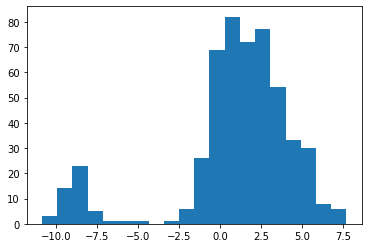

In [37]:
plt.hist(alphas[2], bins=20)

Here it looks like the clusters are separated by -4. 

For each layer, look at the distribution and set the theshold.

In [38]:
thesholds = [0, 0, -4, -3]

masks, alphas = BayesianLayers.get_masks(bayes_modules, 
                                         thesholds, # now we know them
                                         return_log_alpha=True)

In [40]:
print("Pruned architecture: ({}+{})-{}-{}".format(sum(masks[0]), sum(masks[1]), sum(masks[2]), sum(masks[3])))

Pruned architecture: (709+937)-48-140
